In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from tensorflow.keras.datasets import mnist

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [28]:
print(f'The number of data present is {X_train.shape[0]} and the dim of each data i.e. image is {X_train.shape[1]} width and {X_train.shape[2]} height')

The number of data present is 60000 and the dim of each data i.e. image is 28 width and 28 height


In [29]:
single_img = X_train[1]
single_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [30]:
single_img.shape

(28, 28)

In [31]:
y_train[1]

0

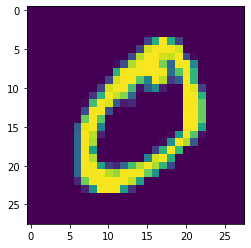

In [32]:
plt.imshow(single_img)

In [33]:
from tensorflow.keras.utils import to_categorical

In [34]:
y_example = to_categorical(y_train)

In [35]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [36]:
y_cat_test = to_categorical(y_test)

In [37]:
y_cat_train = to_categorical(y_train)

In [38]:
X_train = X_train/255
X_test = X_test/255

# Since we are dealing with single channel i.e. Black and White hence we are reshaping the data and adding a single dimension at the end

## batch_size, width, height, colour_channels

In [24]:
X_train = X_train.reshape(60000,28,28,1)

In [25]:
X_test.shape

(10000, 28, 28)

In [26]:
X_test = X_test.reshape(10000,28,28,1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

In [29]:
model = Sequential()

1. filter are typically power of 32
2. more complex / varity of image more number of filters 
3. kernel_size are generally sq matrix of 2x2 4x4 and 3x3 and so on
4. to determine stride divide by no of cols present  in the image by the number of cols of the kernel 28/4 = 7 ie if stride  = 1 then 7 times it will have to move
5. 'same' padding means extra rows and cols might be added automatically so that the output dim is same as input and for 'valid' no padding.

## Since here we have 28 x 28 dim of a img and filter size of 4 hence 28/4 = 7 so our filter is going to move evenly without overshooting. Hence 'same' padding
Explanation: https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

In [30]:
model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), padding = 'valid', input_shape = (28,28,1),activation='relu', ))

## Pool size half of kernel size

In [31]:
model.add(MaxPool2D(pool_size = (2,2)))

In [32]:
model.add(Flatten())

In [33]:
28*28

784

In [34]:
model.add(Dense(units = 128, activation = 'relu'))

# output layer - 1 neuron / class

In [35]:
model.add(Dense(units = 10, activation = 'softmax'))

In [37]:
# keras.io/metrics/
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

In [41]:
model.fit(X_train, y_cat_train, epochs = 10, validation_data = (X_test, y_cat_test), callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0298 - accuracy: 0.9909 - val_loss: 0.0408 - val_accuracy: 0.9857
Epoch 2/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0409 - val_accuracy: 0.9878


In [42]:
import pandas as pd

In [43]:
metrics = pd.DataFrame(model.history.history)

In [44]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.029813,0.990933,0.040760,0.9857
1,0.021690,0.992867,0.040875,0.9878


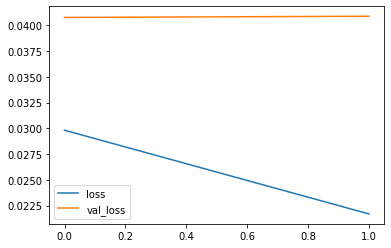

In [46]:
metrics[['loss','val_loss']].plot()

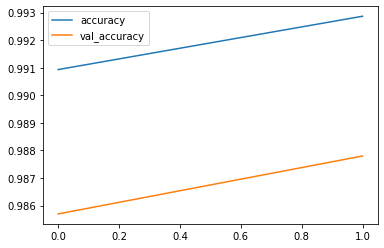

In [47]:
metrics[['accuracy','val_accuracy']].plot()

In [48]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0409 - accuracy: 0.9878


[0.040875036269426346, 0.9878000020980835]

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
prediction = np.argmax(model.predict(X_test), axis=-1)

In [56]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [57]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [58]:
cm = pd.DataFrame(confusion_matrix(y_test, prediction))
cm

,0,1,2,3,4,5,6,7,8,9
0,973,0,2,0,0,0,3,1,1,0
1,0,1133,0,0,0,0,2,0,0,0
2,1,1,1024,0,0,0,2,4,0,0
3,0,0,1,1001,0,6,0,2,0,0
4,0,1,1,0,970,0,5,0,0,5
5,1,0,0,3,0,885,3,0,0,0
6,3,2,0,0,1,1,951,0,0,0
7,1,2,5,1,1,0,0,1016,1,1
8,5,1,8,1,1,2,5,2,943,6
9,1,5,1,2,6,5,0,7,0,982


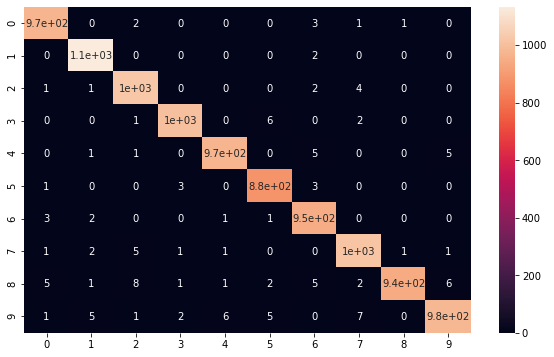

In [61]:
plt.figure(figsize = (10,6))
import seaborn as sns
sns.heatmap(cm, annot = True)

In [62]:
my_number = X_test[0]

In [66]:
my_number.shape

(28, 28, 1)

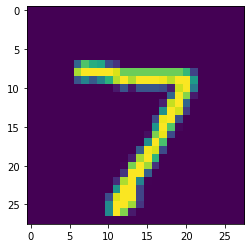

In [71]:
plt.imshow(my_number.reshape(28,28))

In [74]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis = -1)

array([7], dtype=int64)

In [35]:
from tensorflow.keras.datasets import cifar10

In [36]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [37]:
X_train.shape

(50000, 32, 32, 3)

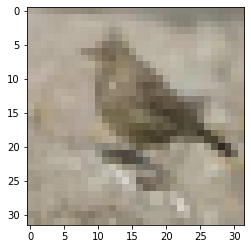

In [38]:
plt.imshow(X_train[120])

In [39]:
X_train = X_train / 255

In [40]:
X_test = X_test / 255

In [41]:
X_train.shape

(50000, 32, 32, 3)

In [42]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [43]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [44]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

In [45]:
y_test_cat = y_test

In [46]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [47]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), padding = 'valid', input_shape = (32,32,3),activation='relu', ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), padding = 'valid', input_shape = (32,32,3),activation='relu', ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(units = 256, activation = 'relu'))

# output layer - 1 neuron / class

model.add(Dense(units = 10, activation = 'softmax'))

# keras.io/metrics/
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

model.fit(X_train, y_train, epochs = 15, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4909 - accuracy: 0.4595 - val_loss: 1.2494 - val_accuracy: 0.5496
Epoch 2/15
1563/1563 [==============================] - 40s 25ms/step - loss: 1.1754 - accuracy: 0.5826 - val_loss: 1.1767 - val_accuracy: 0.5763
Epoch 3/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0352 - accuracy: 0.6383 - val_loss: 1.0914 - val_accuracy: 0.6221
Epoch 4/15
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9326 - accuracy: 0.6735 - val_loss: 1.0312 - val_accuracy: 0.6405
Epoch 5/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8376 - accuracy: 0.7067 - val_loss: 0.9813 - val_accuracy: 0.6696
Epoch 6/15
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7610 - accuracy: 0.7334 - val_loss: 0.9778 - val_accuracy: 0.6714
Epoch 7/15
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6879 - accuracy: 0.7607 - val_loss: 0.9561 -

313/313 [==============================] - 2s 6ms/step - loss: 1.0227 - accuracy: 0.6680


[1.0226808786392212, 0.6679999828338623]

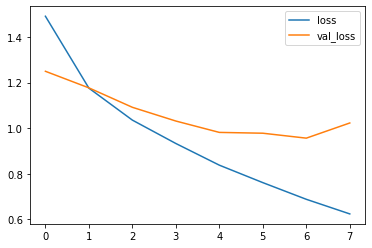

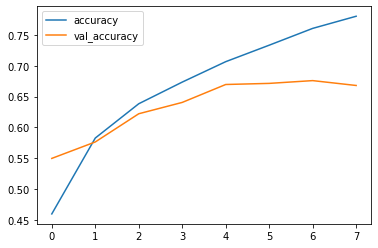

In [50]:
import pandas as pd

metrics = pd.DataFrame(model.history.history)

metrics

metrics[['loss','val_loss']].plot()

metrics[['accuracy','val_accuracy']].plot()

model.evaluate(X_test, y_test)


In [52]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict_classes(X_test)

print(classification_report(y_test_cat, prediction))

cm = pd.DataFrame(confusion_matrix(y_test_cat, prediction))
cm

              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1000
           1       0.73      0.83      0.78      1000
           2       0.71      0.45      0.55      1000
           3       0.51      0.42      0.46      1000
           4       0.63      0.61      0.62      1000
           5       0.52      0.64      0.57      1000
           6       0.71      0.78      0.74      1000
           7       0.68      0.77      0.72      1000
           8       0.86      0.64      0.73      1000
           9       0.74      0.78      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000



,0,1,2,3,4,5,6,7,8,9
0,782,41,21,17,22,13,14,20,32,38
1,20,831,3,8,4,8,14,5,13,94
2,102,22,447,63,100,116,79,55,6,10
3,23,25,31,416,77,242,83,64,15,24
4,34,8,43,59,609,62,63,104,10,8
5,17,6,24,135,51,636,38,73,8,12
6,13,14,33,47,42,42,779,11,7,12
7,14,10,13,31,46,84,11,769,1,21
8,165,76,10,16,13,12,8,14,635,51
9,35,99,6,18,7,16,9,23,11,776


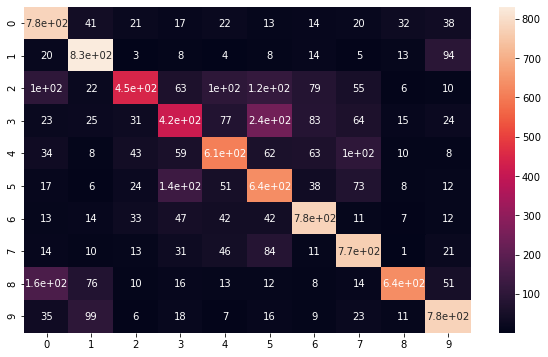

In [53]:
plt.figure(figsize = (10,6))
import seaborn as sns
sns.heatmap(cm, annot = True)